In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import category_encoders as ce   # version 1.2.8
from sklearn.preprocessing import LabelEncoder

In [7]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [35]:
Fraud_Data_path = './Fraud_Data.csv'
IpAddress_to_Country_path = './IpAddress_to_Country.csv'

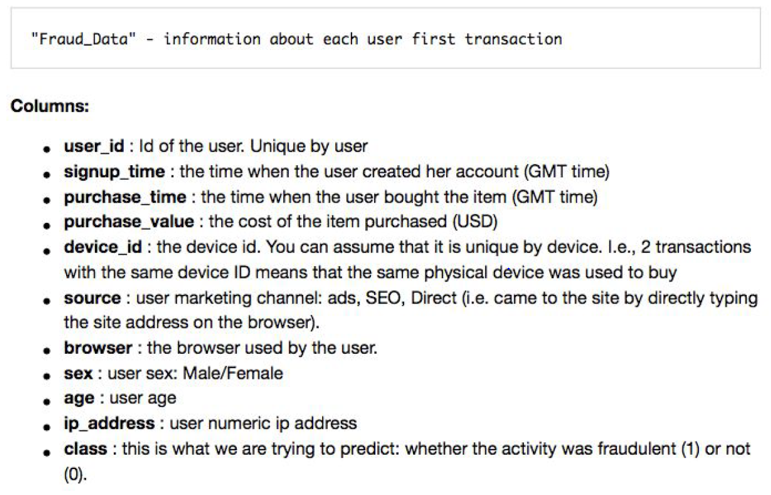

In [36]:
fraud_df = pd.read_csv(Fraud_Data_path)
ipAddress_to_country_df = pd.read_csv(IpAddress_to_Country_path)

#
ipAddress_to_country_df.head(-1)

lower_bound_ip_address  upper_bound_ip_address    country
0                 1.677722e+07                16777471  Australia
1                 1.677747e+07                16777727      China
2                 1.677773e+07                16778239      China
3                 1.677824e+07                16779263  Australia
4                 1.677926e+07                16781311      China
...                        ...                     ...        ...
138840            3.758091e+09              3758092287      China
138841            3.758092e+09              3758093311  Hong Kong
138842            3.758093e+09              3758094335      India
138843            3.758095e+09              3758095871      China
138844            3.758096e+09              3758096127  Singapore

[138845 rows x 3 columns]

In [37]:
#https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark
#from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

fraud_df['source'] = label.fit_transform(fraud_df['source'])
fraud_df['browser'] = label.fit_transform(fraud_df['browser'])
fraud_df['sex'] = label.fit_transform(fraud_df['sex'])
fraud_df['device_id'] = label.fit_transform(fraud_df['device_id'])
fraud_df

user_id          signup_time        purchase_time  purchase_value  \
0         22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1        333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2          1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3        150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4        221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
...         ...                  ...                  ...             ...   
151107   345170  2015-01-27 03:03:34  2015-03-29 00:30:47              43   
151108   274471  2015-05-15 17:43:29  2015-05-26 12:24:39              35   
151109   368416  2015-03-03 23:07:31  2015-05-20 07:07:47              40   
151110   207709  2015-07-09 20:06:07  2015-09-07 09:34:46              46   
151111   138208  2015-06-10 07:02:20  2015-07-21 02:03:53              20   

        device_id  source  browser  sex  age    ip_address  class  
0           89215       2        0    1   39  7.327584e+08      0  
1           24078       0        0    0   53  3.503114e+08      0  
2          131216       2        3    1   53  2.621474e+09      1  
3            3977       2        4    1   41  3.840542e+09      0  
4           68757       0        4    1   45  4.155831e+08      0  
...           ...     ...      ...  ...  ...           ...    ...  
151107     125335       2        0    1   28  3.451155e+09      1  
151108      63001       2        4    1   32  2.439047e+09      0  
151109      64204       2        2    0   26  2.748471e+09      0  
151110      13118       2        0    1   37  3.601175e+09      0  
151111     134439       1        2    1   38  4.103825e+09      0  

[151112 rows x 11 columns]

In [38]:
ipAddress_to_country_df['country'] = label.fit_transform(ipAddress_to_country_df['country'])
ipAddress_to_country_df

lower_bound_ip_address  upper_bound_ip_address  country
0                 1.677722e+07                16777471       11
1                 1.677747e+07                16777727       42
2                 1.677773e+07                16778239       42
3                 1.677824e+07                16779263       11
4                 1.677926e+07                16781311       42
...                        ...                     ...      ...
138841            3.758092e+09              3758093311       92
138842            3.758093e+09              3758094335       95
138843            3.758095e+09              3758095871       42
138844            3.758096e+09              3758096127      188
138845            3.758096e+09              3758096383       11

[138846 rows x 3 columns]

In [39]:
fealtures_to_use = ['class', 'purchase_value', 'source', 'browser', 'sex', 'age']
train = fraud_df[[col for col in fealtures_to_use if col in fraud_df.columns]]

train

class  purchase_value  source  browser  sex  age
0           0              34       2        0    1   39
1           0              16       0        0    0   53
2           1              15       2        3    1   53
3           0              44       2        4    1   41
4           0              39       0        4    1   45
...       ...             ...     ...      ...  ...  ...
151107      1              43       2        0    1   28
151108      0              35       2        4    1   32
151109      0              40       2        2    0   26
151110      0              46       2        0    1   37
151111      0              20       1        2    1   38

[151112 rows x 6 columns]

# Build model

class  purchase_value  source  browser  sex  age
0           0              34       2        0    1   39
1           0              16       0        0    0   53
2           1              15       2        3    1   53
3           0              44       2        4    1   41
4           0              39       0        4    1   45
...       ...             ...     ...      ...  ...  ...
151107      1              43       2        0    1   28
151108      0              35       2        4    1   32
151109      0              40       2        2    0   26
151110      0              46       2        0    1   37
151111      0              20       1        2    1   38

[151112 rows x 6 columns]

In [89]:
import gc
import time
#ML Algoirthm

import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

result_lgb = []
prediction = None #np.zeros((len(test_dataset), 5))
scores = []

enable_model_lightgbm = True
y = train['class']
X = train.drop(['class'], axis = 1)

objective = 'multiclass' #multiclass ; regression

#if (objective == 'regression'):
#    prediction = np.zeros((len(test_dataset)))
#else:
#    prediction = np.zeros((len(test_dataset), 5))
#---------------------------------------------
model = None
if (enable_model_lightgbm == True):
    #setup KFold
    n_fold = 2
    folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=15)
    
    #setup params
    params = {}    
    #
    if (objective == 'regression'):
        params = {'application': 'regression',
                  'boosting': 'gbdt',
                  'metric': 'rmse',
                  'num_leaves': 70,
                  'max_depth': 9,
                  'learning_rate': 0.01,
                  'bagging_fraction': 0.6,  # .85 previously
                  'feature_fraction': 0.6,  # .8 previously
                  'min_split_gain': 0.02,
                  'min_child_samples': 150,
                  'min_child_weight': 0.02,
                  'lambda_l2': 0.0475,
                  'verbosity': -1,
                  'data_random_seed': 17,
                  }
    else:        
        params = {'num_leaves': 512,
                #  'min_data_in_leaf': 60,
                 'objective': 'multiclass',
                 'max_depth': -1,
                 'learning_rate': 0.01,
                 "boosting": "gbdt",
                 "feature_fraction": 0.9,
                 "bagging_freq": 3,
                 "bagging_fraction": 0.9,
                 "bagging_seed": 11,
                #  "lambda_l1": 0.1,
                 # "lambda_l2": 0.1,
                 "random_state": 42,          
                 "verbosity": -1,
                 "num_class": 2}


    
    # Additional parameters:
    early_stop = 500
    verbose_eval = 500
    num_boost_round = 10000
    
    #
    idx = 0
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):
        #chia tập train và valid
        gc.collect()
        print('Fold', fold_n + 1, 'started at', time.ctime())
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        #
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid)

        #Build model lightgbm
        model = lgb.train(params,
                        train_data,
                        num_boost_round = num_boost_round,
                        valid_sets = [train_data, valid_data],
                        verbose_eval = verbose_eval,
                        early_stopping_rounds = early_stop)
        #prediction cho tập valid
        y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)

        #
        y_valid = y_valid.to_numpy()
        y_pred_valid = y_pred_valid.argmax(1)
        #print('y_valid is type:', type(y_valid))
        #print('y_pred_valid is type:', type(y_pred_valid))
        
        print('y_valid.shape: ', y_valid.shape, y_valid)
        print('y_pred_valid.shape ', y_pred_valid.shape, y_pred_valid)
        #print(y_pred_valid)
        #
        score = accuracy_score(y_valid, y_pred_valid)
        print('score: ', score)
        
        #
        result_dict = {}
        result_dict['valid'] = y_valid
        result_dict['prediction'] = y_pred_valid
        result_dict['idx'] = idx
        result_dict['score'] = score
        
        result_lgb.append(result_dict)
        #
        idx = idx + 1
        print('')
        #prediction += y_pred

    #chia lấy trung bình    
    #prediction /= n_fold

#print('scores kappa: ', scores)    
#print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
#result_dict_lgb['prediction'] = prediction
#

#submission_lgb = None
#if (objective == 'regression'):
#    submission_prediction_lgb = (result_dict_lgb['prediction'])
#    submission_lgb = pd.DataFrame({'PetID': sub.PetID, 'AdoptionSpeed': [int(i) for i in submission_prediction_lgb]})
#else:
#    submission_prediction_lgb = (result_dict_lgb['prediction']).argmax(1)
#    submission_lgb = pd.DataFrame({'PetID': sub.PetID, 'AdoptionSpeed': [int(i) for i in submission_prediction_lgb]})                

Fold 1 started at Wed Aug  5 22:29:19 2020
Training until validation scores don't improve for 500 rounds
[500]	training's multi_logloss: 0.198364	valid_1's multi_logloss: 0.24751
[1000]	training's multi_logloss: 0.16676	valid_1's multi_logloss: 0.247655
Early stopping, best iteration is:
[738]	training's multi_logloss: 0.181136	valid_1's multi_logloss: 0.245788
y_valid.shape:  (75557,) [0 0 0 ... 0 0 0]
y_pred_valid.shape  (75557,) [0 0 0 ... 0 0 0]
score:  0.9219794327461387

Fold 2 started at Wed Aug  5 22:30:38 2020
Training until validation scores don't improve for 500 rounds
[500]	training's multi_logloss: 0.198932	valid_1's multi_logloss: 0.24791
[1000]	training's multi_logloss: 0.166875	valid_1's multi_logloss: 0.247116
Early stopping, best iteration is:
[748]	training's multi_logloss: 0.180642	valid_1's multi_logloss: 0.245642
y_valid.shape:  (75555,) [0 1 0 ... 1 0 0]
y_pred_valid.shape  (75555,) [0 1 0 ... 0 0 0]
score:  0.9211832439944412



In [90]:
result_lgb

[{'valid': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'prediction': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
  'idx': 0,
  'score': 0.9219794327461387},
 {'valid': array([0, 1, 0, ..., 1, 0, 0], dtype=int64),
  'prediction': array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
  'idx': 1,
  'score': 0.9211832439944412}]

In [91]:
model

In [85]:
from datetime import datetime

date_time_str = '2015-02-24 22:55:49'#'18/09/19 01:55:19'

date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)

The type of the date is now <class 'datetime.datetime'>
The date is 2015-02-24 22:55:49


In [87]:
date_time_obj.strftime("%A")

'Tuesday'

In [98]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 


In [95]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred_valid = model.predict(X, num_iteration=model.best_iteration)

In [97]:
score = accuracy_score(y, y_pred_valid.argmax(1))
print('score: ', score)

score:  0.9259357297898247
